In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('movie_profit.csv')

In [8]:
data_horror = data[data["genre"] == "Horror"].reset_index(drop = True)
data_horror.sample(5)

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
114,2060,7/12/2002,Halloween: Resurrection,15000000.0,30259652.0,37659652.0,Miramax/Dimension,R,Horror
164,2430,9/16/2016,Blair Witch,10000000.0,20777061.0,37478274.0,Lionsgate,R,Horror
93,1863,9/9/2005,The Exorcism of Emily Rose,18000000.0,75072454.0,144529078.0,Sony Pictures,PG-13,Horror
236,3026,9/22/2006,Feast,3200000.0,56131.0,690872.0,Weinstein/Dimension,R,Horror
112,2056,8/28/2009,Halloween 2,15000000.0,33392973.0,38512850.0,Weinstein/Dimension,R,Horror


In [9]:
data = data.drop('Unnamed: 0', axis = 1)
data = data.reset_index(drop = True)

In [10]:
data["date"] = pd.to_datetime(data["release_date"])
data["day"] = data["date"].dt.day
data["month"] = data["date"].dt.month
data["year"] = data["date"].dt.year

In [11]:
print("Null values % rate:")
for column_name in data.columns:
    if data[column_name].isna().sum() > 0:
        print(f"{column_name} - {round(data[column_name].isna().sum() / len(data) * 100,2)} % : {data[column_name].isna().sum()} / {len(data)}")

Null values % rate:
distributor - 1.41 % : 48 / 3401
mpaa_rating - 4.03 % : 137 / 3401


In [12]:
data.groupby(['genre']).count()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,date,day,month,year
genre,,,,,,,,,,,
Action,573,573,573,573,573,565,546,573,573,573,573
Adventure,481,481,481,481,481,477,473,481,481,481,481
Comedy,813,813,813,813,813,804,780,813,813,813,813
Drama,1236,1236,1236,1236,1236,1212,1198,1236,1236,1236,1236
Horror,298,298,298,298,298,295,267,298,298,298,298


In [11]:
data_horror = data[data["genre"] == "Horror"].reset_index(drop = True)
data_horror.sample(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,date,day,month,year
94,4/11/2008,Prom Night,18000000.0,43869350.0,57193655.0,Sony Pictures,PG-13,Horror,2008-04-11,11,4,2008
223,10/19/1990,Night of the Living Dead,4200000.0,5835247.0,5835247.0,Sony Pictures,R,Horror,1990-10-19,19,10,1990
37,3/15/2002,Resident Evil,35000000.0,40119709.0,103787401.0,Sony Pictures,R,Horror,2002-03-15,15,3,2002
234,3/13/1987,Evil Dead II,3500000.0,5923044.0,5923044.0,Rosebud Releasing,NaN,Horror,1987-03-13,13,3,1987
226,5/13/2016,The Darkness,4000000.0,10753574.0,10898293.0,High Top Releasing,PG-13,Horror,2016-05-13,13,5,2016


In [12]:
data_horror['movie (year)'] = data_horror.movie + " (" + data_horror.year.astype(str) + ")"
data_horror["Budget $M"] = (data_horror['production_budget'] / 1e6).apply('${:.0f}M'.format)
data_horror["Revenue"] = data_horror.worldwide_gross - data_horror.production_budget
data_horror['Revenue $M'] = (data_horror['Revenue'] / 1e6).apply('${:.0f}M'.format)
data_horror['ROI'] = ((data_horror["worldwide_gross"] - data_horror["production_budget"]) / data_horror["production_budget"]) * 100
data_horror['AVG_prod_budget'] = data_horror["production_budget"].mean()
data_horror['MED_prod_budget'] = data_horror["production_budget"].median()
data_horror['MAX_prod_budget'] = data_horror["production_budget"].max()
data_horror['MIN_prod_budget'] = data_horror["production_budget"].min()
data_horror['Participation'] = (data_horror["worldwide_gross"] / data_horror["worldwide_gross"].sum()) * 100
data_horror['STD_prod_budget'] = data_horror["production_budget"].std()
data_horror['Dispersion_budget'] = data_horror["production_budget"] - data_horror["production_budget"].median()
data_horror['DateYear'] = data_horror['day'].astype(str) + '.' + data_horror['month'].astype(str)

data_horror.sample(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,date,day,...,Revenue $M,ROI,AVG_prod_budget,MED_prod_budget,MAX_prod_budget,MIN_prod_budget,Participation,STD_prod_budget,Dispersion_budget,DateYear
256,10/31/2008,Eden Lake,2000000.0,7321.0,4294373.0,Third Rail,R,Horror,2008-10-31,31,...,$2M,114.718650,1.722417e+07,10750000.0,150000000.0,325000.0,0.021431,2.058424e+07,-8750000.0,31.10
117,9/22/2000,Urban Legends: Final Cut,15000000.0,21468807.0,38574362.0,Sony Pictures,R,Horror,2000-09-22,22,...,$24M,157.162413,1.722417e+07,10750000.0,150000000.0,325000.0,0.192500,2.058424e+07,4250000.0,22.9
19,9/10/2004,Resident Evil: Apocalypse,50000000.0,50740078.0,125168734.0,Sony Pictures,R,Horror,2004-09-10,10,...,$75M,150.337468,1.722417e+07,10750000.0,150000000.0,325000.0,0.624638,2.058424e+07,39250000.0,10.9


In [13]:
data_horror_top10 = data_horror.sort_values(by=['Revenue'], ascending = False).reset_index(drop=True).head(10)

In [17]:
data_horror_top10[['movie (year)','Revenue $M','Budget $M','distributor']]


,movie (year),Revenue $M,Budget $M,distributor
0,It (2017),$662M,$35M,Warner Bros.
1,Jaws (1975),$459M,$12M,Universal
2,I am Legend (2007),$436M,$150M,Warner Bros.
3,The Exorcist (1973),$391M,$12M,Warner Bros.
4,A Quiet Place (2018),$318M,$17M,Paramount Pictures
5,The Conjuring (2013),$298M,$20M,Warner Bros.
6,Annabelle: Creation (2017),$290M,$15M,Warner Bros.
7,Split (2017),$273M,$5M,Universal
8,Hannibal (2001),$263M,$87M,MGM
9,Get Out (2017),$250M,$5M,Universal


In [18]:
data_horror_top10_dist = data_horror_top10.groupby('distributor', as_index=False).agg({
    'Revenue': 'sum',
    'movie (year)': 'count'}).sort_values(by=['Revenue'], ascending=False).reset_index(drop=True)
data_horror_top10_dist = data_horror_top10_dist.rename(columns={'movie (year)': 'Number of Movies'})
data_horror_top10_dist

,distributor,Revenue,Number of Movies
0,Warner Bros.,2.077113e+09,5
1,Universal,9.823699e+08,3
2,Paramount Pictures,3.175244e+08,1
3,MGM,2.631003e+08,1


In [19]:
data_horror_dist = data_horror.groupby('distributor', as_index=False).agg({
    'Revenue': 'sum',
    'production_budget': 'sum',
    'movie (year)': 'count'}).sort_values(by=['Revenue'], ascending=False).reset_index(drop=True)

data_horror_dist = data_horror_dist.rename(columns={'movie (year)': 'Number of Movies', 'production_budget': 'Total budget'})
best_movies = data_horror.loc[data_horror.groupby('distributor')['Revenue'].idxmax()][['distributor', 'movie (year)','Revenue','production_budget']]

data_horror_dist = data_horror_dist.merge(best_movies, on='distributor', how='left')
data_horror_dist = data_horror_dist.rename(columns={'movie (year)': 'Best movie from Distributor',
                                                    'Revenue_y' : 'Movie Revenue',
                                                    'Revenue_x' : 'Total Revenue',
                                                    'production_budget' : 'Production budget'})

data_horror_dist['Totel Revenue per movie'] = data_horror_dist['Total Revenue'] / data_horror_dist['Number of Movies']
data_horror_dist['Total Budget per movie'] = data_horror_dist['Total budget'] / data_horror_dist['Number of Movies']
data_horror_dist['% Revenue share'] = data_horror_dist['Total Revenue'] / sum(data_horror_dist['Total Revenue']) * 100


data_horror_dist

,distributor,Total Revenue,Total budget,Number of Movies,Best movie from Distributor,Movie Revenue,Production budget,Totel Revenue per movie,Total Budget per movie,% Revenue share
0,Warner Bros.,3.168698e+09,897000000.0,30,It (2017),662459228.0,35000000.0,1.056233e+08,2.990000e+07,21.252077
1,Universal,2.190431e+09,712177000.0,33,Jaws (1975),458700000.0,12000000.0,6.637668e+07,2.158112e+07,14.690956
2,Sony Pictures,2.092000e+09,855200000.0,32,Resident Evil: Afterlife (2010),238374190.0,57500000.0,6.537499e+07,2.672500e+07,14.030793
3,Paramount Pictures,1.438168e+09,341000000.0,21,A Quiet Place (2018),317524361.0,17000000.0,6.848420e+07,1.623810e+07,9.645623
4,Lionsgate,1.424774e+09,252150000.0,29,Saw III (2006),153876815.0,10000000.0,4.913014e+07,8.694828e+06,9.555790
...,...,...,...,...,...,...,...,...,...,...
65,Anchor Bay Entertai…,-6.681705e+06,9750000.0,4,The Lords of Salem (2013),41131.0,1500000.0,-1.670426e+06,2.437500e+06,-0.044813
66,Sony/TriStar,-1.339646e+07,25000000.0,1,Lifeforce (1985),-13396455.0,25000000.0,-1.339646e+07,2.500000e+07,-0.089848
67,Omin/Freestyle,-1.390628e+07,20000000.0,1,Dylan Dog: Dead of Night (2011),-13906275.0,20000000.0,-1.390628e+07,2.000000e+07,-0.093268
68,Overture Films,-2.296657e+07,40000000.0,1,Pandorum (2009),-22966569.0,40000000.0,-2.296657e+07,4.000000e+07,-0.154034


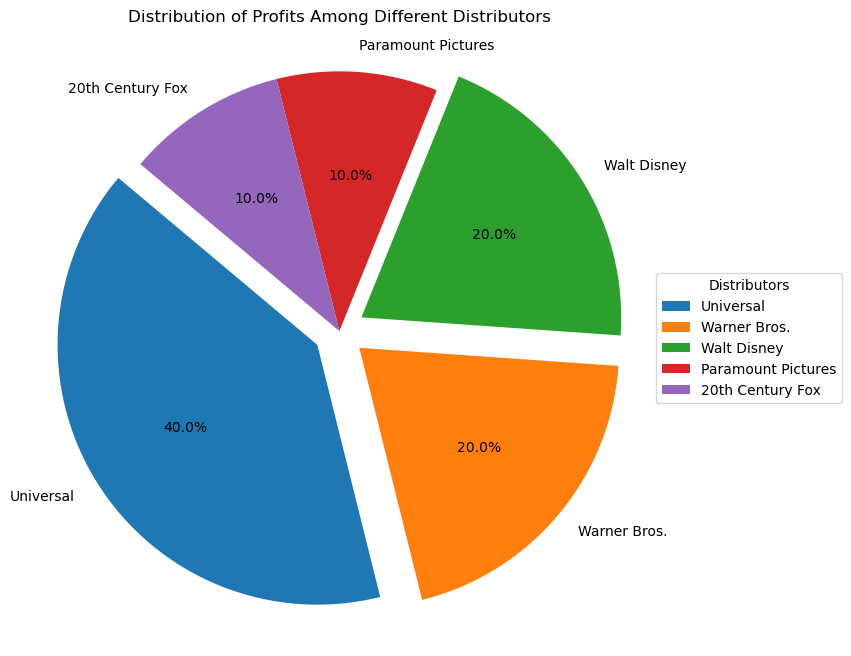

In [13]:
distributor_data = data['distributor'].head(10).value_counts()

top_distributors = distributor_data.index[:3]

# Define explode values
explode = [0.1 if distributor in top_distributors else 0 for distributor in distributor_data.index]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(distributor_data, labels=distributor_data.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Profits Among Different Distributors')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding legend
plt.legend(title="Distributors", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

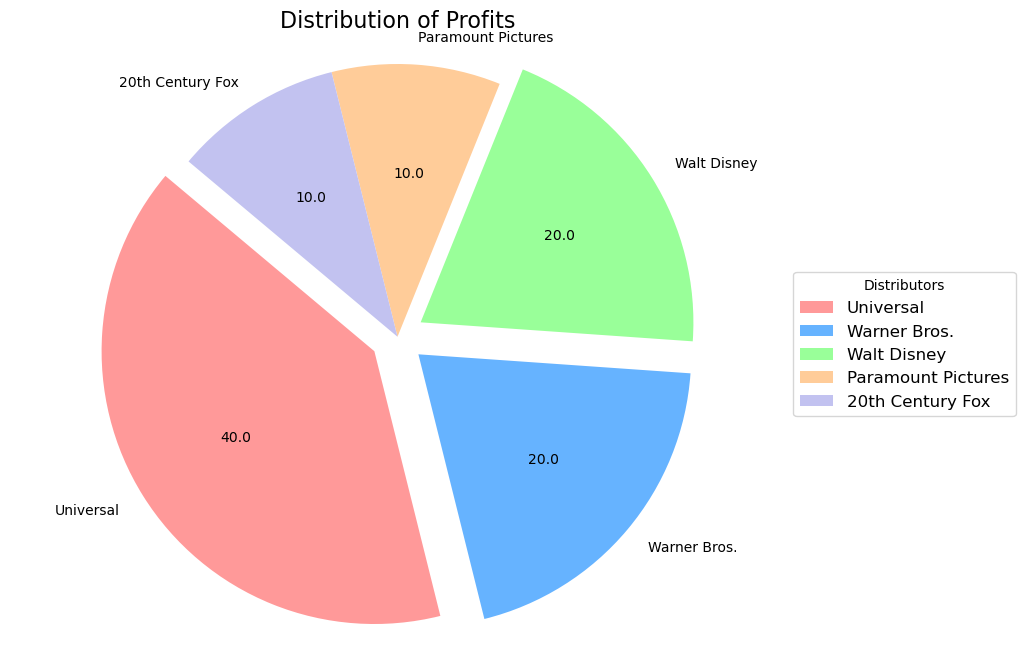

In [4]:
import matplotlib.pyplot as plt

distributor_data = data['distributor'].head(10).value_counts()

# Extract top 3 distributors
top_distributors = distributor_data.index[:3]

# Define explode values
explode = [0.1 if distributor in top_distributors else 0 for distributor in distributor_data.index]

# Define colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb3b3', '#c2c2d6', '#ff6666']

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(distributor_data, labels=distributor_data.index, autopct='%1.1f', startangle=140, explode=explode, colors=colors)
plt.title('Distribution of Profits', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding legend
plt.legend(title="Distributors", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
plt.style.use('classic')

plt.show()


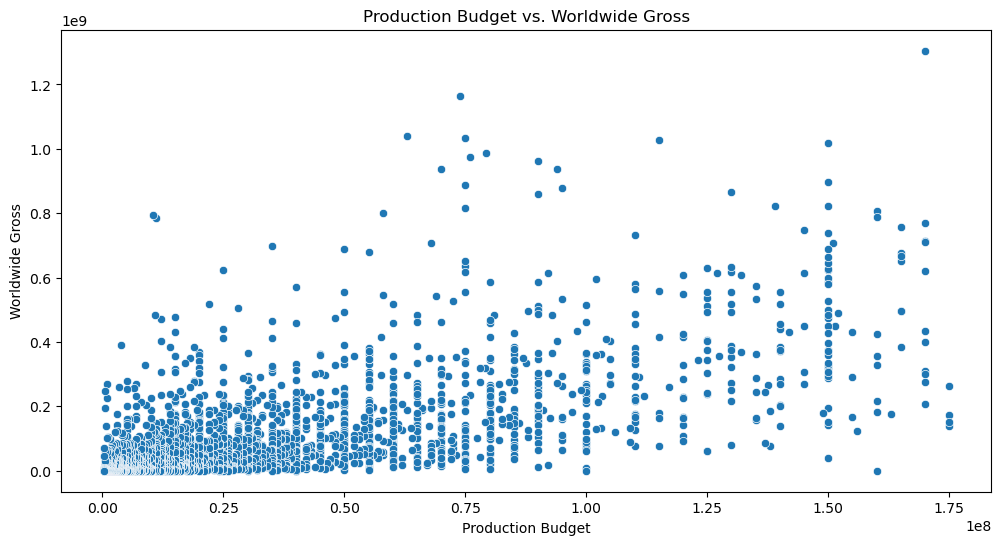

In [17]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='production_budget', y='worldwide_gross')
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

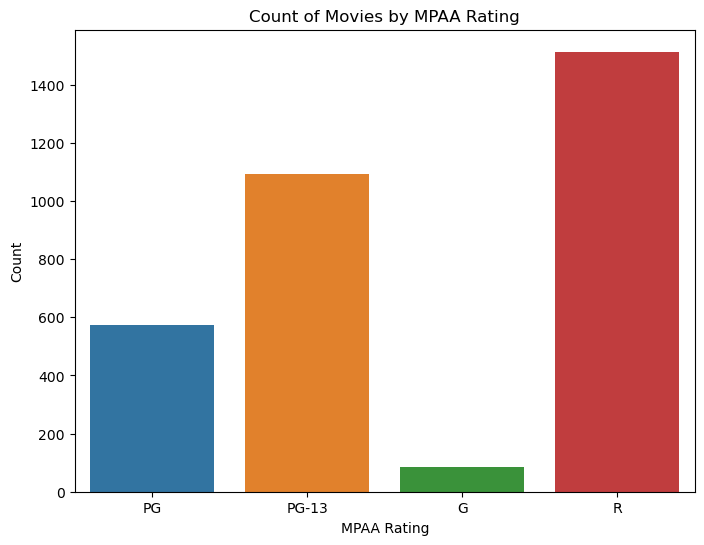

In [18]:
# Plotting a count of movies by MPAA rating
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='mpaa_rating')
plt.title('Count of Movies by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Count')
plt.show()

In [1]:
# Plotting a boxplot of domestic gross by genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='genre', y='domestic_gross')
plt.title('Domestic Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Domestic Gross')
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined